# Data Cleaning

Now that the data has been cleaned through Excel (see "1 Excel Clean Log" for the data cleaning steps done so far), I will proceed with the rest of the data cleaning through python in this jupyter notebook. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import calendar

In [2]:
# The excel cleaned data is being loaded here as a pandas data frame.
df = pd.read_csv('weatherstats_vancouver_hourly_excelclean.csv')
df.head()

,date_time_local,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_okta,max_air_temp_pst1hr,min_air_temp_pst1hr
0,2013-07-01 00:00:00 PDT,101.18,101.16,SSE,16.0,7,NaN,91,18.2,19.7,0.0,0.0,32200.0,2.9,NaN,19.4,18.5
1,2013-07-01 01:00:00 PDT,101.22,101.21,SE,13.0,6,NaN,89,17.8,19.6,0.0,0.0,32200.0,3.0,NaN,20.1,18.7
2,2013-07-01 02:00:00 PDT,101.26,101.24,E,10.0,11,NaN,88,16.7,18.7,0.0,0.0,32200.0,3.0,NaN,19.8,18.0
3,2013-07-01 03:00:00 PDT,101.26,101.25,E,10.0,4,NaN,84,16.5,19.2,0.0,0.0,32200.0,2.7,NaN,18.5,17.5
4,2013-07-01 04:00:00 PDT,101.30,101.28,NNW,33.0,5,NaN,87,15.7,17.9,0.0,0.0,32200.0,2.6,NaN,18.8,17.3


In [3]:
# Now that the data frame is loaded I need to check the data types for all the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time_local      87648 non-null  object 
 1   pressure_station     87648 non-null  float64
 2   pressure_sea         87648 non-null  float64
 3   wind_dir             87648 non-null  object 
 4   wind_dir_10s         87617 non-null  float64
 5   wind_speed           87648 non-null  int64  
 6   wind_gust            7872 non-null   float64
 7   relative_humidity    87648 non-null  int64  
 8   dew_point            87648 non-null  float64
 9   temperature          87648 non-null  float64
 10  windchill            87642 non-null  float64
 11  humidex              85631 non-null  float64
 12  visibility           87606 non-null  float64
 13  health_index         86746 non-null  float64
 14  cloud_okta           84593 non-null  float64
 15  max_air_temp_pst1hr  87412 non-null 

In [4]:
# Changing the data type for date to datetime. Used utc=False argument to remove the PDT indicator as it was causing an error.
df['date_time_local'] = pd.to_datetime(df['date_time_local'], utc=False)
# The data column can now be set as the index.
df = df.set_index('date_time_local')
df.head()

C:\Users\pedro\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\pedro\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_okta,max_air_temp_pst1hr,min_air_temp_pst1hr
date_time_local,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,101.18,101.16,SSE,16.0,7,NaN,91,18.2,19.7,0.0,0.0,32200.0,2.9,NaN,19.4,18.5
2013-07-01 01:00:00,101.22,101.21,SE,13.0,6,NaN,89,17.8,19.6,0.0,0.0,32200.0,3.0,NaN,20.1,18.7
2013-07-01 02:00:00,101.26,101.24,E,10.0,11,NaN,88,16.7,18.7,0.0,0.0,32200.0,3.0,NaN,19.8,18.0
2013-07-01 03:00:00,101.26,101.25,E,10.0,4,NaN,84,16.5,19.2,0.0,0.0,32200.0,2.7,NaN,18.5,17.5
2013-07-01 04:00:00,101.30,101.28,NNW,33.0,5,NaN,87,15.7,17.9,0.0,0.0,32200.0,2.6,NaN,18.8,17.3


In [5]:
# Confirmed, 'date_time_local' has been changed to datetime type and it has been set as an index.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87648 entries, 2013-07-01 00:00:00 to 2023-06-30 23:00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pressure_station     87648 non-null  float64
 1   pressure_sea         87648 non-null  float64
 2   wind_dir             87648 non-null  object 
 3   wind_dir_10s         87617 non-null  float64
 4   wind_speed           87648 non-null  int64  
 5   wind_gust            7872 non-null   float64
 6   relative_humidity    87648 non-null  int64  
 7   dew_point            87648 non-null  float64
 8   temperature          87648 non-null  float64
 9   windchill            87642 non-null  float64
 10  humidex              85631 non-null  float64
 11  visibility           87606 non-null  float64
 12  health_index         86746 non-null  float64
 13  cloud_okta           84593 non-null  float64
 14  max_air_temp_pst1hr  87412 non-null  float64
 15  m

## Cleaning Up Missing Values

In [6]:
# We need to clean the rest of the data and we will start by identifying the missing values.
df.isna().sum()

pressure_station           0
pressure_sea               0
wind_dir                   0
wind_dir_10s              31
wind_speed                 0
wind_gust              79776
relative_humidity          0
dew_point                  0
temperature                0
windchill                  6
humidex                 2017
visibility                42
health_index             902
cloud_okta              3055
max_air_temp_pst1hr      236
min_air_temp_pst1hr      236
dtype: int64

### wind_dir_10s 

In [7]:
# The wind_dir_10s is a mirror of the wind_dir column. It states wind direction in degrees instead of the cardinal directions.
df = df.drop('wind_dir_10s', axis=1)

In [8]:
# I'm creating a copy of the dataframe here before I begin filling NA values.
df2 = df.copy()

### humidex

In [9]:
# This is the formula to calculate the humidex.
humidex = (df['temperature'] + 0.5555 * ((6.11 * 2.71828 ** (5417.753 * ((1/273.16) - (1/(273.15 + df['dew_point']))))) - 10)).round()

In [10]:
# I am using the fillna function and entering the formula above to calculate those missing values.
df2['humidex'].fillna(humidex, inplace=True)

In [11]:
# This is a double check to make sure the missing values were replaced.
df2.isna().sum()

pressure_station           0
pressure_sea               0
wind_dir                   0
wind_speed                 0
wind_gust              79776
relative_humidity          0
dew_point                  0
temperature                0
windchill                  6
humidex                    0
visibility                42
health_index             902
cloud_okta              3055
max_air_temp_pst1hr      236
min_air_temp_pst1hr      236
dtype: int64

In [12]:
# The missing values for humidex were spread randomly through the data, I will download the data to a csv to review for accuracy.
df2.to_csv('humidex_test.csv', index=True)

Upon review of the humidex_test.csv in Excel I was able to confirm the humidex is being calculated correctly for the previously empty values. Also, the values are rounding up or down accordingly.

### wind_gust_percent

In [13]:
# There are a lot of missing values for wind_gust, I will calculate the percentage of data available in this column.
wind_gust_percent = (df2['wind_gust'].value_counts().sum()/df2['wind_gust'].shape[0]*100).round()
print(f"NA Values for wind_gust: {df2['wind_gust'].isna().sum()}")
print()
print(f"Values for wind_gust: {df2['wind_gust'].value_counts().sum()}")
print()
print(f"Percentage of wind_gust data available: {wind_gust_percent}")

NA Values for wind_gust: 79776

Values for wind_gust: 7872

Percentage of wind_gust data available: 9.0


Despite the low percentage of data available, wind_gust may still be a valuable variable. I have decided to keep it and explore it further. I will enter 0 for the empty values to indicate no wind gust was present during those observations.

In [14]:
df2['wind_gust'].fillna(0, inplace=True)

In [15]:
df2.isna().sum()

pressure_station          0
pressure_sea              0
wind_dir                  0
wind_speed                0
wind_gust                 0
relative_humidity         0
dew_point                 0
temperature               0
windchill                 6
humidex                   0
visibility               42
health_index            902
cloud_okta             3055
max_air_temp_pst1hr     236
min_air_temp_pst1hr     236
dtype: int64

### cloud_okta

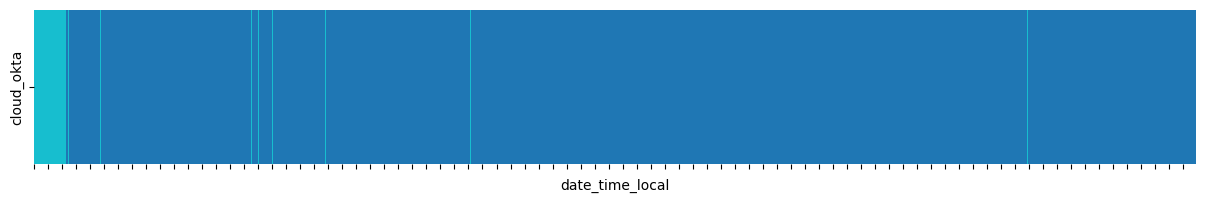

In [16]:
# I will plot a heatmap of the cloud_okta missing values below to visualize the missing data.
plt.figure(figsize=(15, 2))
cloud_okta_df = df2[['cloud_okta']]
ax = sns.heatmap(cloud_okta_df.isna().T, cmap="tab10", cbar=False)
ax.set(xticklabels=[])
plt.show()

The distribution of NA values shows a large amount of missing values at the beginning of the data set. Upon review of the data in Excel, I was able to ascertain that the first 2407 values are missing. This likely due to a change in the measurement type for cloud cover. The data used a different method to measure cloud cover before June 2013.

In [17]:
# I have decided to enter the average for cloud_okta for the first 2407 rows.
df2['cloud_okta'].fillna(df2['cloud_okta'].mean().round(), limit = 2407, inplace= True)

In [18]:
df2.isna().sum()

pressure_station         0
pressure_sea             0
wind_dir                 0
wind_speed               0
wind_gust                0
relative_humidity        0
dew_point                0
temperature              0
windchill                6
humidex                  0
visibility              42
health_index           902
cloud_okta             648
max_air_temp_pst1hr    236
min_air_temp_pst1hr    236
dtype: int64

In [19]:
# The remaining null values in the cloud_okta column will be filled with the interpolate function.
df2['cloud_okta'] = df2['cloud_okta'].interpolate().round()

In [20]:
# Downloaded the dataset again to check that the null values were accurately filled.
df2.to_csv('cloud_test.csv', index=True)

I reviewed the data again through excel and have confirmed everything was filled accordingly. The interpolated values are also accurately connecting the data where they were missing.

### windchill

Upon review of the data so far, I noticed the missing values for windchill correspond to rows where no wind was present. I will fill these six null values with 0.

In [21]:
df2['windchill'].fillna(0, inplace= True)

In [22]:
df2.isna().sum()

pressure_station         0
pressure_sea             0
wind_dir                 0
wind_speed               0
wind_gust                0
relative_humidity        0
dew_point                0
temperature              0
windchill                0
humidex                  0
visibility              42
health_index           902
cloud_okta               0
max_air_temp_pst1hr    236
min_air_temp_pst1hr    236
dtype: int64

### visibility

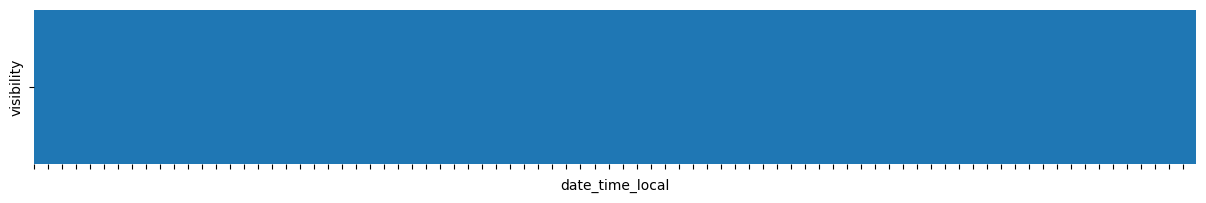

In [23]:
# I will plot a heatmap of the visibliity missing values below to see where the values are occuring.
plt.figure(figsize=(15, 2))
visibility_df = df2[['visibility']]
ax = sns.heatmap(visibility_df.isna().T, cmap="tab10", cbar=False)
ax.set(xticklabels=[])
plt.show()

There are only 42 missing values for visibility and they are not visible on the heatmap above. This likely means the missing value rows are not near other rows with missing values.

In [24]:
# Based on the information above I will use interpolate to fill the missing values.
df2['visibility'] = df2['visibility'].interpolate().round()

### health_index

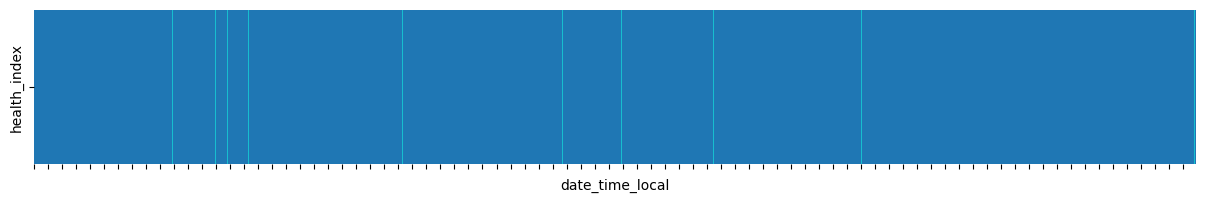

In [25]:
# Using the heatmap again as I did with previous variables to visualize the missing data.
plt.figure(figsize=(15, 2))
health_index_df = df2[['health_index']]
ax = sns.heatmap(health_index_df.isna().T, cmap="tab10", cbar=False)
ax.set(xticklabels=[])
plt.show()

There are no visible patterns to the missing values, but some rows with missing values are neighboring each other. I will proceed with the interpolate function to fill these values.

In [26]:
df2['health_index'] = df2['health_index'].interpolate().round(1)

### max_air_temp_pst1hr

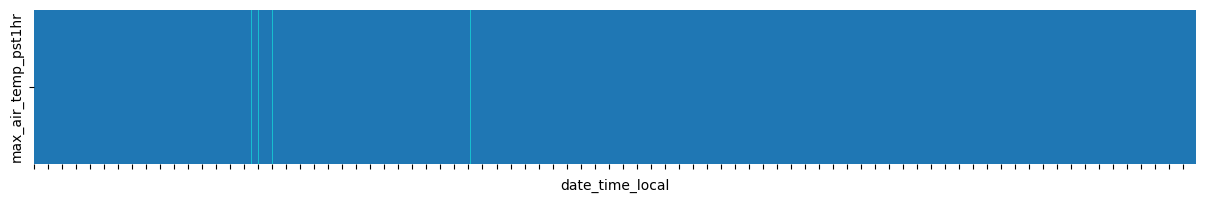

In [27]:
# Using the heatmap again.
plt.figure(figsize=(15, 2))
max_air_temp_pst1hr_df = df2[['max_air_temp_pst1hr']]
ax = sns.heatmap(max_air_temp_pst1hr_df.isna().T, cmap="tab10", cbar=False)
ax.set(xticklabels=[])
plt.show()

No visible patterns here either, but some missing value rows are neighboring each other. Using interpolate for this column as well.

In [28]:
df2['max_air_temp_pst1hr'] = df2['max_air_temp_pst1hr'].interpolate().round(1)

### min_air_temp_pst1hr

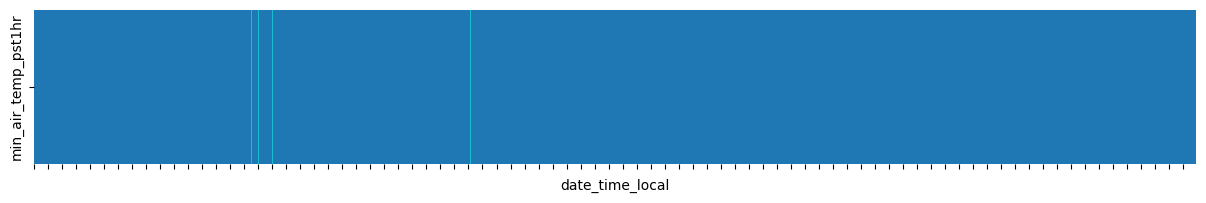

In [29]:
# Using the heatmap again.
plt.figure(figsize=(15, 2))
min_air_temp_pst1hr_df = df2[['min_air_temp_pst1hr']]
ax = sns.heatmap(min_air_temp_pst1hr_df.isna().T, cmap="tab10", cbar=False)
ax.set(xticklabels=[])
plt.show()

Something to note is that the missing values for max and min air temperature in the past hour are missing for the same rows. This did not affect the temperature column, which is our target variable.

In [30]:
df2['min_air_temp_pst1hr'] = df2['min_air_temp_pst1hr'].interpolate().round(1)

In [31]:
# Checking to confirm all missing values have been addressed.
df2.isna().sum()

pressure_station       0
pressure_sea           0
wind_dir               0
wind_speed             0
wind_gust              0
relative_humidity      0
dew_point              0
temperature            0
windchill              0
humidex                0
visibility             0
health_index           0
cloud_okta             0
max_air_temp_pst1hr    0
min_air_temp_pst1hr    0
dtype: int64

In [32]:
df2.to_csv('../data/weatherstats_vancouver_hourly_clean.csv', index=True)

Now that the data has been cleaned I will proceed with the Preliminary Exploratory Data Analysis.